# Model reduction task

We use a dataset, compiled by the World Health Organization and the United Nations. It tracks factors that affect life expectancy. The dataset contains 2938 rows and 22 columns, including country, year, developing status, adult mortality, life expectancy, infant deaths, alcohol consumption per capita, country’s expenditure on health, immunization coverage, BMI, deaths under five years old, deaths due to HIV/AIDS, GDP, population, body condition, income information, and education: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

## 1. Import Data

In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [46]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## 2. Clean the data

In [47]:
# Clean column names: remove whitespace, replace spaces with underscores, and convert to lowercase
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Verify the cleaned column names
print(df.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [48]:
# Drop 'Status' and 'Country' columns
df = df.drop(columns=['status', 'country'])

# Verify the columns have been dropped
display(df.head())

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [49]:
# Handle missing values (imputation with mean for numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             2938 non-null   int64  
 1   life_expectancy                  2938 non-null   float64
 2   adult_mortality                  2938 non-null   float64
 3   infant_deaths                    2938 non-null   int64  
 4   alcohol                          2938 non-null   float64
 5   percentage_expenditure           2938 non-null   float64
 6   hepatitis_b                      2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   under-five_deaths                2938 non-null   int64  
 10  polio                            2938 non-null   float64
 11  total_expenditure                2938 non-null   float64
 12  diphtheria          

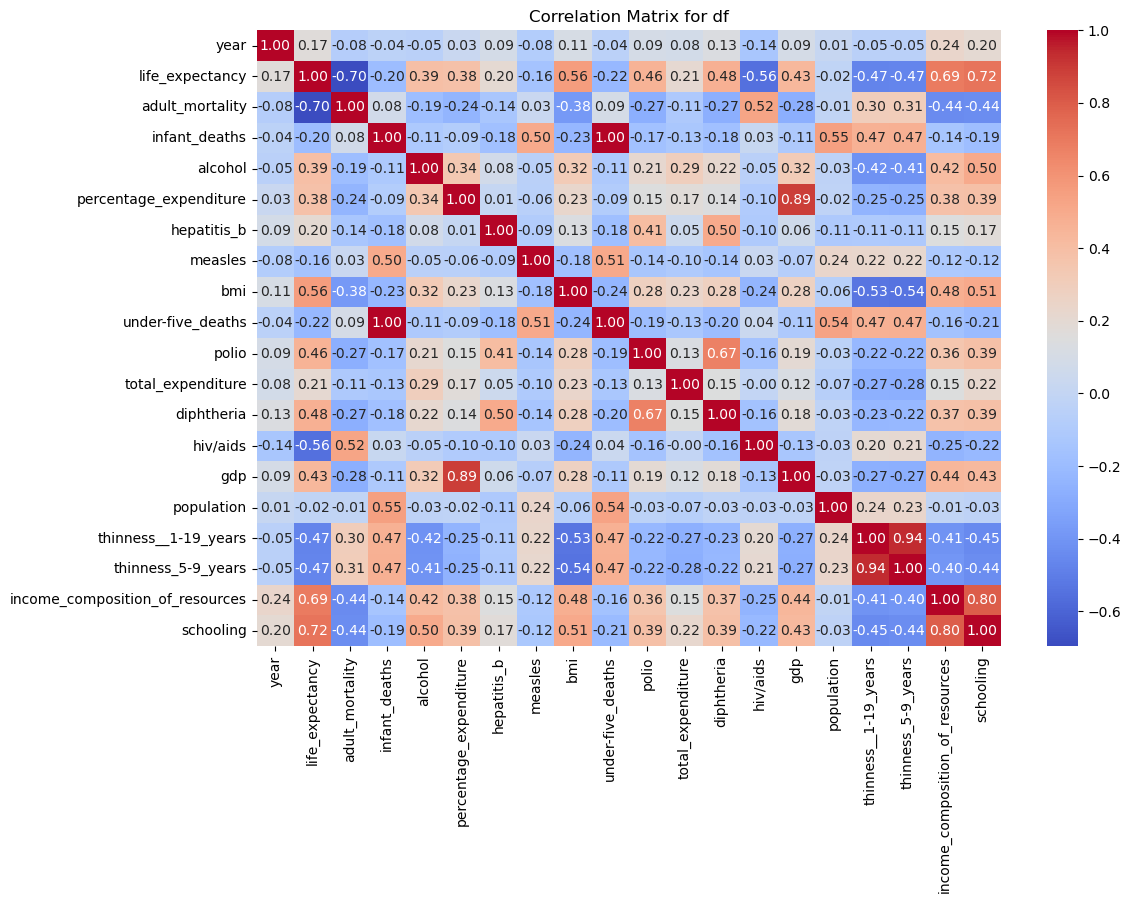

In [50]:
# Plot the correlation matrix for df
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for df")
plt.show()

## 3. Split the data

In [51]:
# Define dependent and independent variables
dependent_var = 'life_expectancy'
independent_vars = [col for col in df.columns if col != dependent_var]

# Split the data into train and test sets
X = df[independent_vars]
y = df[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Check and clean redundant predictors

In [52]:
# Check for Redundancy of Predictors
# Use correlation matrix (e.g., Variance Inflation Factor - VIF) to identify redundant predictors
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                            feature         VIF
0                              year   59.278439
1                   adult_mortality    4.777689
2                     infant_deaths  172.518579
3                           alcohol    3.730648
4            percentage_expenditure    5.422377
5                       hepatitis_b   19.479904
6                           measles    1.439047
7                               bmi    8.209542
8                 under-five_deaths  172.876827
9                             polio   26.429421
10                total_expenditure    8.285850
11                       diphtheria   28.417139
12                         hiv/aids    1.579259
13                              gdp    6.486619
14                       population    1.447342
15             thinness__1-19_years   18.548609
16               thinness_5-9_years   18.632398
17  income_composition_of_resources   33.764883
18                        schooling   49.846052


In [53]:
# Check for Multicollinearity income and schooling
corr = df[['income_composition_of_resources', 'schooling']].corr()
print(corr)

                                 income_composition_of_resources  schooling
income_composition_of_resources                         1.000000   0.796207
schooling                                               0.796207   1.000000


In [54]:
# Check for Multicollinearity deseases
correlation_matrix = X_train[['polio', 'diphtheria', 'hepatitis_b']].corr()
print(correlation_matrix)

                polio  diphtheria  hepatitis_b
polio        1.000000    0.670861     0.407903
diphtheria   0.670861    1.000000     0.492513
hepatitis_b  0.407903    0.492513     1.000000


Highly Correlated Predictors:
* infant_deaths and under-five_deaths have extremely high VIF values (172.5+), indicating severe multicollinearity. These variables likely provide redundant information,
* year, polio, schooling, and others like income_composition_of_resources also have high VIF values above the threshold of 10, requiring attention.

Actions:
* we drop under-five_deaths and leave infant_deaths as they are almost the same,
* drop year as well as it has zero info about life expectancy,
* drop schooling as it has large multicorrineliaty with income composition,
* combine thinness as metrics are very close.

In [55]:
# Drop columns due to multicollinearity
X_train = X_train.drop(columns=['under-five_deaths', 'year', 'schooling'])
X_test = X_test.drop(columns=['under-five_deaths', 'year', 'schooling'])

In [56]:
# Combine the two columns into a single metric
X_train['thinness_combined'] = (X_train['thinness__1-19_years'] + X_train['thinness_5-9_years']) / 2
X_test['thinness_combined'] = (X_test['thinness__1-19_years'] + X_test['thinness_5-9_years']) / 2

# Drop the original columns
X_train = X_train.drop(columns=['thinness__1-19_years', 'thinness_5-9_years'])
X_test = X_test.drop(columns=['thinness__1-19_years', 'thinness_5-9_years'])

In [57]:
X_train['immunization_score'] = X_train[['polio', 'diphtheria', 'hepatitis_b']].mean(axis=1)
X_test['immunization_score'] = X_test[['polio', 'diphtheria', 'hepatitis_b']].mean(axis=1)

# Drop original columns
X_train = X_train.drop(columns=['polio', 'diphtheria', 'hepatitis_b'])
X_test = X_test.drop(columns=['polio', 'diphtheria', 'hepatitis_b'])

In [58]:
# Recalculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                            feature        VIF
0                   adult_mortality   3.770761
1                     infant_deaths   2.143309
2                           alcohol   3.491653
3            percentage_expenditure   5.395671
4                           measles   1.374074
5                               bmi   7.533834
6                 total_expenditure   7.347417
7                          hiv/aids   1.563978
8                               gdp   6.451735
9                        population   1.399300
10  income_composition_of_resources  16.179481
11                thinness_combined   3.813812
12               immunization_score  17.311615


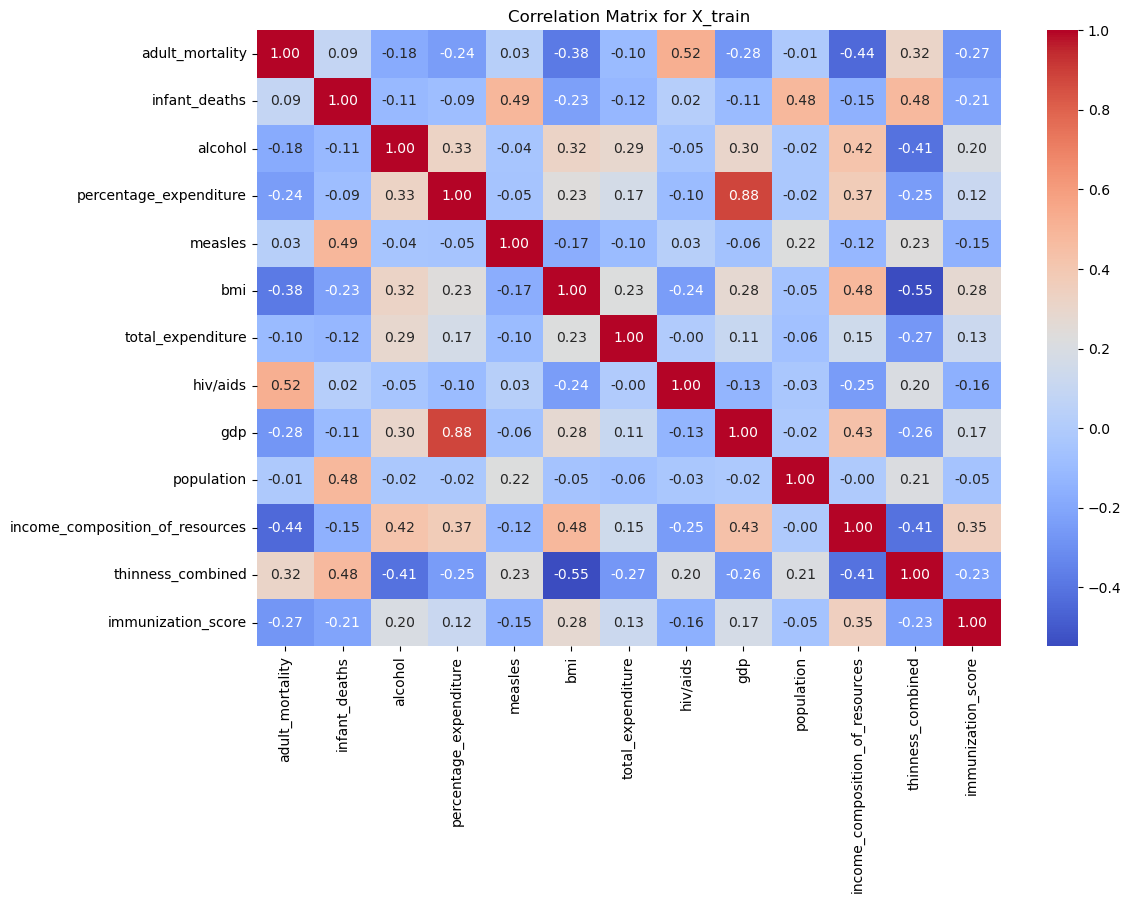

In [59]:
# Plot the correlation matrix for X_train
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for X_train")
plt.show()

## 5. Inspect distributions

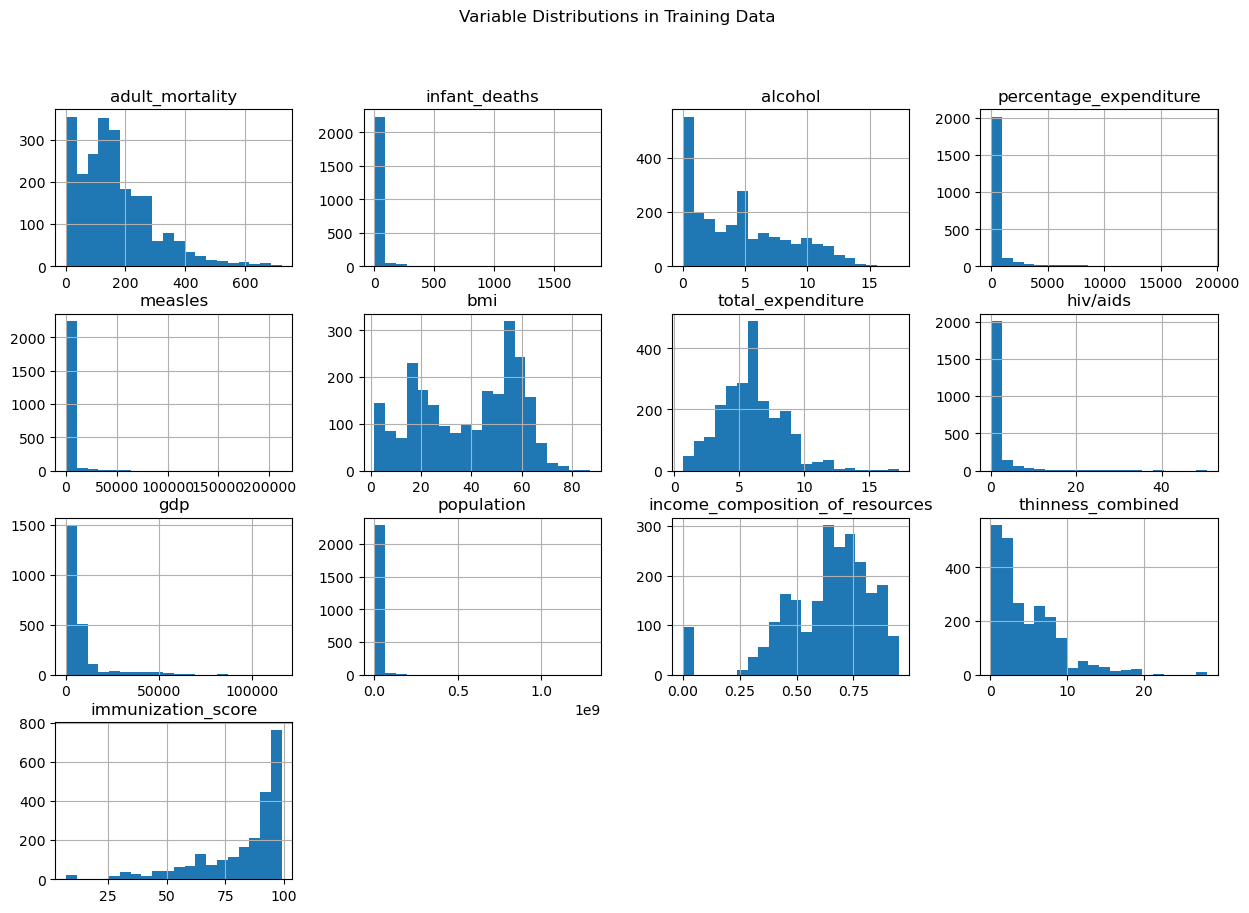

In [60]:
# Inspect Distributions
# Check the distributions of variables through histograms
X_train.hist(bins=20, figsize=(15, 10))
plt.suptitle("Variable Distributions in Training Data")
plt.show()

count    2350.000000
mean       69.276978
std         9.556300
min        36.300000
25%        63.300000
50%        72.200000
75%        75.700000
max        89.000000
Name: life_expectancy, dtype: float64


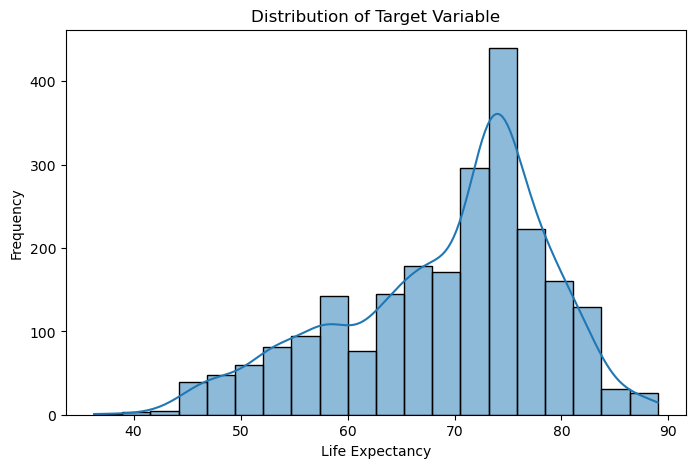

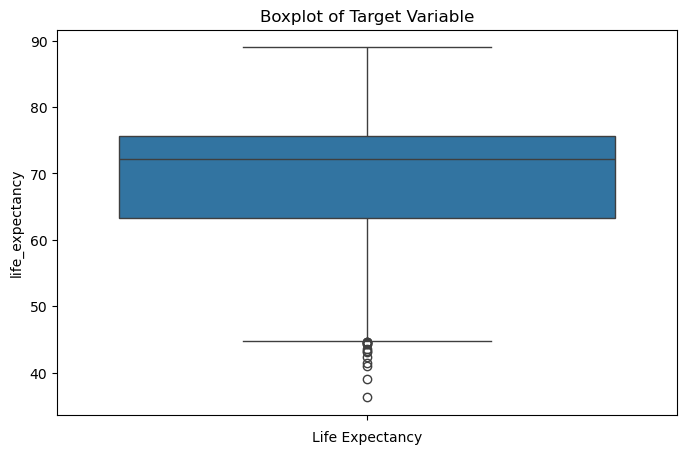

Shapiro-Wilk Test: Statistic = 0.9547418546893631 , p-value = 2.1455866340242877e-26
The target variable does not appear to be normally distributed.


In [61]:
# Check the distribution of the target variable
print(y_train.describe())

plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=20, kde=True)
plt.title("Distribution of Target Variable")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train)
plt.title("Boxplot of Target Variable")
plt.xlabel("Life Expectancy")
plt.show()

from scipy.stats import shapiro
stat, p = shapiro(y_train)
print("Shapiro-Wilk Test: Statistic =", stat, ", p-value =", p)

if p > 0.05:
    print("The target variable appears to be normally distributed.")
else:
    print("The target variable does not appear to be normally distributed.")

**Conclusions about target variable:**
* The distribution of life expectancy appears to be right-skewed, with a concentration around 70-80 years.
* The boxplot indicates the presence of outliers, particularly on the lower end (below ~50 years).
* For non-normally distributed target it is better to use Gamma GLM.

## 6. Train GLM model

Gamma GLM Mean Squared Error: 18.62636573002094
Gamma GLM Mean Absolute Error: 3.128290013898467
Gamma GLM R-squared: 0.7850025255886587


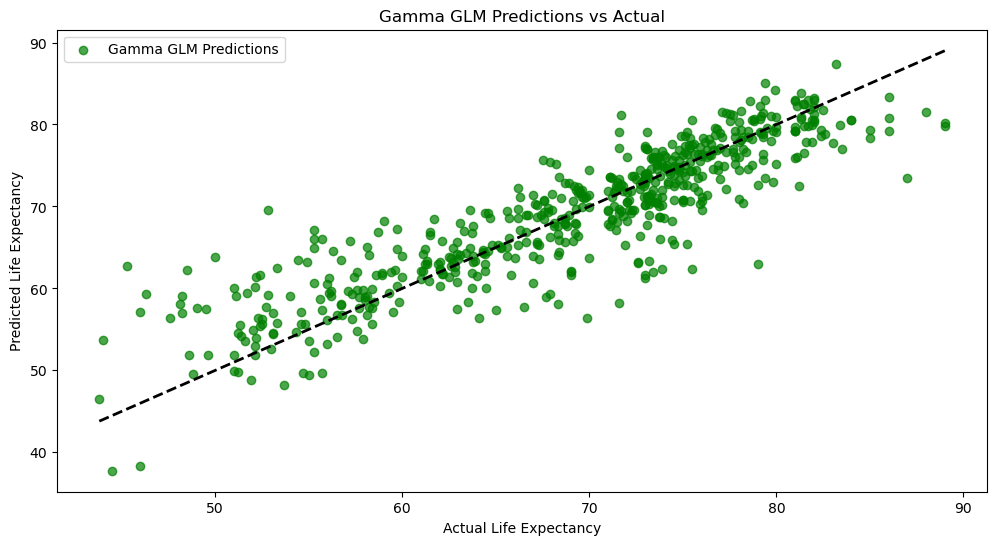

In [62]:
# Add a constant for GLM
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit a Generalized Linear Model (GLM) with Gamma family
gamma_model = sm.GLM(y_train, X_train_const, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Predictions using Gamma GLM
gamma_predictions = gamma_model.predict(X_test_const)

# Model evaluation for Gamma GLM
print("Gamma GLM Mean Squared Error:", mean_squared_error(y_test, gamma_predictions))
print("Gamma GLM Mean Absolute Error:", mean_absolute_error(y_test, gamma_predictions))
print("Gamma GLM R-squared:", r2_score(y_test, gamma_predictions))

# Compare predictions visually
plt.figure(figsize=(12, 6))

# Scatter plot for Gamma GLM predictions
plt.scatter(y_test, gamma_predictions, label="Gamma GLM Predictions", alpha=0.7, color='green')

# Identity line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Plot labels and title
plt.title("Gamma GLM Predictions vs Actual")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend()
plt.show()

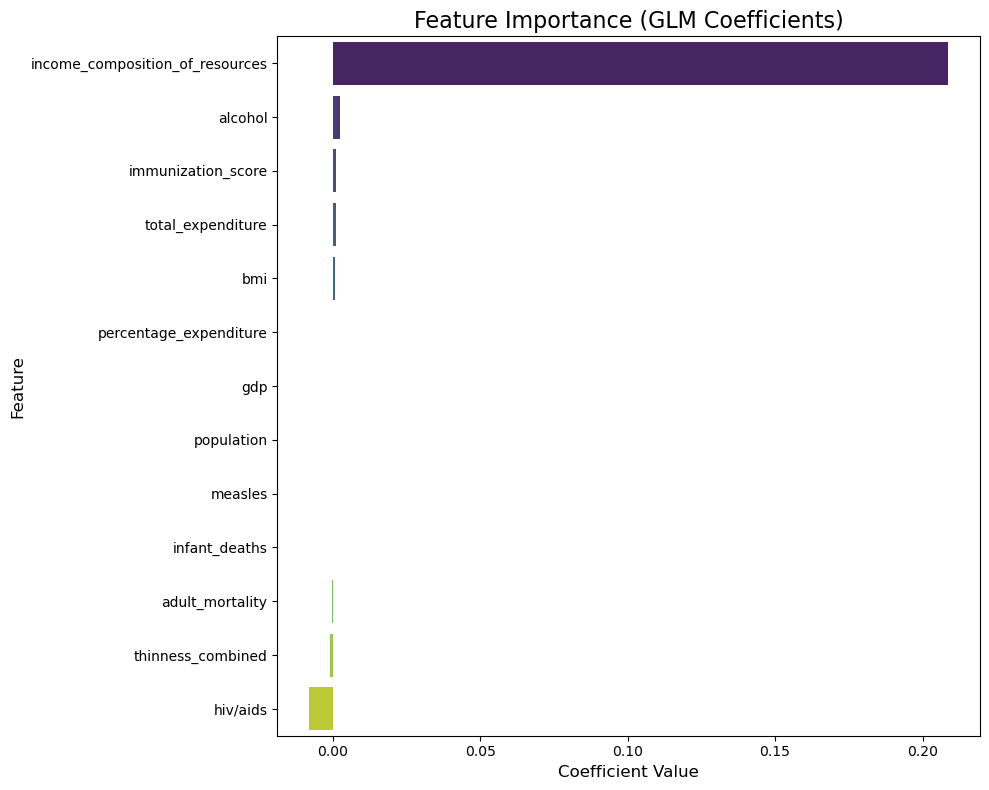

In [63]:
# Extract GLM coefficients
glm_coefficients = gamma_model.params

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': glm_coefficients.index,
    'Coefficient': glm_coefficients.values
}).sort_values(by='Coefficient', ascending=False)

# Exclude 'const' from the plot
feature_importance_no_const = feature_importance[feature_importance['Feature'] != 'const']

# Plot the Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_no_const, y='Feature', x='Coefficient', palette='viridis')
plt.title('Feature Importance (GLM Coefficients)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**Conclusion:** Income is the most important feature for life expectancy.

## 7. Validation on different manually specified candidate modells

In [64]:
# Rename columns to make them compatible with formula syntax
df.rename(columns={
    'hiv/aids': 'hiv_aids',
    'under-five_deaths': 'under_five_deaths',
    'thinness__1-19_years': 'thinness_1_19_years',
    'thinness_5-9_years': 'thinness_5_9_years',
}, inplace=True)

# Ensure all special characters are handled
df.columns = df.columns.str.replace('/', '_').str.replace('-', '_').str.replace('__', '_')

# Print columns to confirm changes
print("Updated column names:", df.columns)

# Define multiple hypotheses with combinations of variables
formulas = {
    "Hypothesis 1": 'life_expectancy ~ adult_mortality + alcohol',
    "Hypothesis 2": 'life_expectancy ~ adult_mortality + bmi + income_composition_of_resources',
    "Hypothesis 3": 'life_expectancy ~ alcohol + percentage_expenditure + gdp',
    "Hypothesis 4": 'life_expectancy ~ adult_mortality + hiv_aids + bmi',
    "Hypothesis 5": 'life_expectancy ~ income_composition_of_resources + gdp + population',
    "Hypothesis 6": 'life_expectancy ~ total_expenditure + income_composition_of_resources + bmi',
    "Hypothesis 7": 'life_expectancy ~ adult_mortality + under_five_deaths + percentage_expenditure',
    "Hypothesis 8": 'life_expectancy ~ hiv_aids + gdp + bmi',
    "Hypothesis 9": 'life_expectancy ~ alcohol + total_expenditure + bmi',
    "Hypothesis 10": 'life_expectancy ~ population + thinness_1_19_years + thinness_5_9_years',
    "Hypothesis 11": 'life_expectancy ~ adult_mortality + bmi + total_expenditure',
    "Hypothesis 12": 'life_expectancy ~ percentage_expenditure + gdp + under_five_deaths'
}

# Fit models and store results
models = {}
for name, formula in formulas.items():
    # Fit the model using statsmodels formula API
    model = smf.glm(formula=formula, data=df, family=sm.families.Gamma(link=sm.families.links.log())).fit()
    models[name] = model
    print(f"{name} - AIC: {model.aic}")

# Fit the original GLM model for comparison
X_train_const = sm.add_constant(X_train)  # Ensure constant is added
glm_model = sm.GLM(y_train, X_train_const, family=sm.families.Gamma(link=sm.families.links.log())).fit()

# Compare the AIC of each hypothesis with the original GLM model
print("\nModel Comparison:")
print(f"Original GLM Model - AIC: {glm_model.aic}")
for name, model in models.items():
    print(f"{name} - AIC: {model.aic}")

# Identify the best hypothesis model
best_model_name = min(models, key=lambda x: models[x].aic)
print(f"\nBest hypothesis: {best_model_name} with AIC: {models[best_model_name].aic}")


Updated column names: Index(['year', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')
Hypothesis 1 - AIC: 19411.543895050258
Hypothesis 2 - AIC: 18434.11443387981
Hypothesis 3 - AIC: 21033.106943613617
Hypothesis 4 - AIC: 18811.647667045865
Hypothesis 5 - AIC: 19999.00956375383
Hypothesis 6 - AIC: 19677.676576000737
Hypothesis 7 - AIC: 19436.98578341941
Hypothesis 8 - AIC: 19368.28415669065
Hypothesis 9 - AIC: 20595.760418737365
Hypothesis 10 - AIC: 21071.076420983525
Hypothesis 11 - AIC: 19185.462997646748
Hypothesis 12 - AIC: 21173.366699888567

Model Comparison:
Original GLM Model - AIC: 13961.32416625274
Hypothesis 1 - AIC: 19411.543895050258
Hypothesis 2 - AIC: 18434.1

We manually specified some modells. None of them performs better in terms of AIC than the gamma-modell. So we will use the general gamma model for all following steps.

## 8. Automatic Model reduction using p-values and AIC

In [65]:
# Step 1: Model Reduction Based on p-values
def reduce_model_pvalues(data, target, significance_level=0.05):
    X = data.copy()
    X_const = sm.add_constant(X)
    y = target

    while True:
        model = sm.GLM(y, X_const, family=sm.families.Gamma(link=sm.families.links.log())).fit()
        pvalues = model.pvalues
        max_pvalue = pvalues.max()
        if max_pvalue > significance_level:
            # Remove the feature with the highest p-value
            feature_to_remove = pvalues.idxmax()
            print(f"Removing {feature_to_remove} with p-value {max_pvalue}")
            X_const = X_const.drop(columns=[feature_to_remove])
        else:
            break
    
    print("Final Model Based on p-values:")
    print(model.summary())
    return model, X_const

# Step 2: Model Reduction Based on AIC
def reduce_model_aic(data, target):
    X = data.copy()
    X_const = sm.add_constant(X)
    y = target

    best_aic = float('inf')
    best_model = None
    best_features = X_const.columns

    while True:
        model = sm.GLM(y, X_const, family=sm.families.Gamma(link=sm.families.links.log())).fit()
        current_aic = model.aic
        print(f"Current AIC: {current_aic}")
        
        if current_aic < best_aic:
            best_aic = current_aic
            best_model = model
            best_features = X_const.columns
        else:
            break
        
        # Remove one feature at a time and evaluate AIC
        aic_values = {}
        for feature in X_const.columns:
            if feature != 'const':
                X_temp = X_const.drop(columns=[feature])
                temp_model = sm.GLM(y, X_temp, family=sm.families.Gamma(link=sm.families.links.log())).fit()
                aic_values[feature] = temp_model.aic

        # Find the feature whose removal minimizes AIC
        feature_to_remove = min(aic_values, key=aic_values.get)
        print(f"Removing {feature_to_remove} with AIC {aic_values[feature_to_remove]}")
        X_const = X_const.drop(columns=[feature_to_remove])

    print("Final Model Based on AIC:")
    print(best_model.summary())
    return best_model, best_features

# Apply the model reduction functions
print("Performing Model Reduction Based on p-values...")
model_pvalues, X_reduced_pvalues = reduce_model_pvalues(X_train, y_train)

# Apply the model reduction functions
print("\nPerforming Model Reduction Based on AIC...")
model_aic, best_features_aic = reduce_model_aic(X_train, y_train)

Performing Model Reduction Based on p-values...
Removing gdp with p-value 0.2835890523894381
Removing infant_deaths with p-value 0.1614549485466955
Removing total_expenditure with p-value 0.1259319028399969
Removing population with p-value 0.08948122407443455
Final Model Based on p-values:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        life_expectancy   No. Observations:                 2350
Model:                            GLM   Df Residuals:                     2340
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                       0.0046011
Method:                          IRLS   Log-Likelihood:                -6970.9
Date:                Mon, 09 Dec 2024   Deviance:                       11.029
Time:                        14:14:22   Pearson chi2:                     10.8
No. Iterations:                    11   Pseudo R-squ. (CS):             0.969

In [66]:
# Apply the model reduction functions
print("\nPerforming Model Reduction Based on AIC...")
model_aic, best_features_aic = reduce_model_aic(X_train, y_train)


Performing Model Reduction Based on AIC...
Current AIC: 13961.32416625274
Removing gdp with AIC 13960.460055517671
Current AIC: 13960.460055517671
Removing infant_deaths with AIC 13960.501753442142
Current AIC: 13960.501753442142
Final Model Based on AIC:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        life_expectancy   No. Observations:                 2350
Model:                            GLM   Df Residuals:                     2337
Model Family:                   Gamma   Df Model:                           12
Link Function:                    log   Scale:                       0.0045918
Method:                          IRLS   Log-Likelihood:                -6967.2
Date:                Mon, 09 Dec 2024   Deviance:                       10.996
Time:                        14:14:23   Pearson chi2:                     10.7
No. Iterations:                    11   Pseudo R-squ. (CS):             0.9702
Covariance Type:            nonr

In [67]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(sm.add_constant(X_test))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    aic = model.aic
    return mse, r2, aic

# Evaluate the p-values reduced model
print("\nEvaluating Model Reduced by p-values...")
mse_pvalues, r2_pvalues, aic_pvalues = evaluate_model(model_pvalues, X_test[X_reduced_pvalues.columns[1:]], y_test)
print(f"Model Reduced by p-values - MSE: {mse_pvalues:.4f}, R²: {r2_pvalues:.4f}, AIC: {aic_pvalues:.4f}")

# Evaluate the AIC reduced model
print("\nEvaluating Model Reduced by AIC...")
mse_aic, r2_aic, aic_aic = evaluate_model(model_aic, X_test[best_features_aic[1:]], y_test)
print(f"Model Reduced by AIC - MSE: {mse_aic:.4f}, R²: {r2_aic:.4f}, AIC: {aic_aic:.4f}")

# Comparison
print("\nModel Comparison:")
print(f"p-values Model -> MSE: {mse_pvalues:.4f}, R²: {r2_pvalues:.4f}, AIC: {aic_pvalues:.4f}")
print(f"AIC Model     -> MSE: {mse_aic:.4f}, R²: {r2_aic:.4f}, AIC: {aic_aic:.4f}")


Evaluating Model Reduced by p-values...
Model Reduced by p-values - MSE: 18.8701, R²: 0.7822, AIC: 13961.7160

Evaluating Model Reduced by AIC...
Model Reduced by AIC - MSE: 18.6587, R²: 0.7846, AIC: 13960.4601

Model Comparison:
p-values Model -> MSE: 18.8701, R²: 0.7822, AIC: 13961.7160
AIC Model     -> MSE: 18.6587, R²: 0.7846, AIC: 13960.4601


The AIC Model is slightly better as it has:
* Lower Mean Squared Error (MSE), indicating better prediction accuracy.
* Higher R², suggesting a slightly better fit to the data.
* Lower AIC, showing a better balance between model complexity and goodness of fit.

## 9. Perform data splitting

In [68]:
# Function to perform data splitting and calculate MSE
def evaluate_mse_with_splits(model, X, y, splits):
    results = {}
    for train_size in splits:
        # Perform data splitting
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
            X, y, train_size=train_size, random_state=42
        )

        # Make predictions on the test split
        y_pred_split = model.predict(sm.add_constant(X_test_split))

        # Calculate MSE
        mse_score = mean_squared_error(y_test_split, y_pred_split)
        results[f"{int(train_size * 100)}:{int((1 - train_size) * 100)}"] = mse_score
    return results

# Splits to evaluate
splits = [0.1, 0.3, 0.5]

# Evaluate MSE for different splits using the AIC model
print("Evaluating MSE for different splits (AIC Model)...")
mse_results = evaluate_mse_with_splits(
    model_aic, X_train[best_features_aic[1:]], y_train, splits
)

# Display the results
print("\nMSE Scores for Different Splits:")
for split, mse in mse_results.items():
    print(f"Train:Test Split {split} -> MSE: {mse:.4f}")

Evaluating MSE for different splits (AIC Model)...

MSE Scores for Different Splits:
Train:Test Split 10:90 -> MSE: 19.3663
Train:Test Split 30:70 -> MSE: 19.4909
Train:Test Split 50:50 -> MSE: 19.4475


**Conclusion:**
* The stability of MSE across splits reflects a well-tuned model with low variance.
* The small changes in MSE suggest that the AIC-reduced model is robust and does not overfit even with smaller training data.